In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns 
import sys

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid')
    rc('font', family=font_name)

In [3]:
df = pd.read_csv('NYC_taxi.csv')

In [4]:
df['zip_code'] = df['zip_code'].astype(str)
df['day'] = df['pickup_hour'].str[:10]
df.drop(['pickup_hour','month','is_weekend'], axis=1, inplace=True)

In [5]:
요일 = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# df['weekday'] = [요일[x] for x in df['weekday']]

In [6]:
df2 = df.groupby(['zip_code'])['cnt'].sum().to_frame()
df2.reset_index(inplace=True)
df2['cnt'] = df2['cnt']/31
df2.rename(columns={'cnt':'avg_cnt'}, inplace=True)
df2.sort_values(by='avg_cnt', axis=0, ascending=False, inplace=True)
df2 = df2.reset_index().drop('index',axis=1)

In [7]:
i = 25

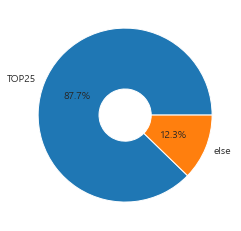

In [8]:
ratio = [sum(df2['avg_cnt'][:i]), sum(df2['avg_cnt'][i:])]
labels = ['TOP{}'.format(i), 'else']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.pie(ratio, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()

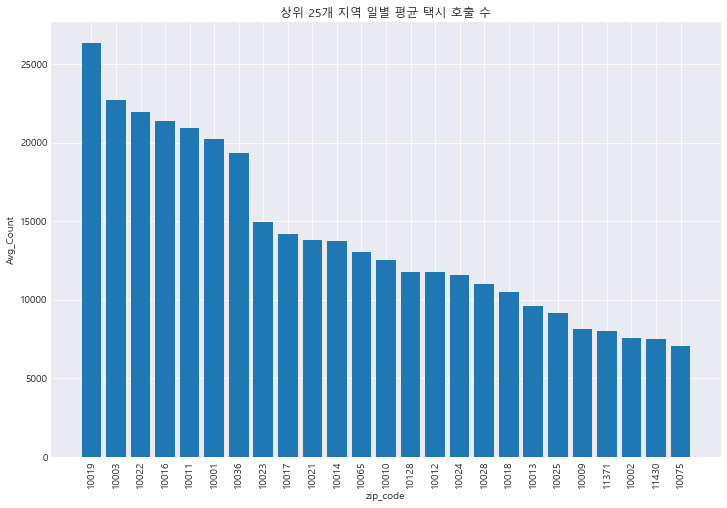

In [9]:
plt.figure(figsize=(12, 8))
# plt.plot(df2.index[:i], df2['avg_cnt'][:i])
plt.bar(df2['zip_code'][:i], df2['avg_cnt'][:i])
plt.xticks(rotation=90)
plt.xlabel('zip_code')
plt.ylabel('Avg_Count') 
plt.title('상위 {}개 지역 일별 평균 택시 호출 수'.format(i))

plt.show()

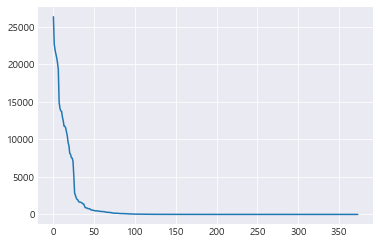

In [10]:
plt.plot(df2.index, df2['avg_cnt'])
plt.show()

In [11]:
zip_code = df2['zip_code'][:i]
df3 = pd.merge(df,zip_code,how='inner')
df3

,zip_code,day,weekday,hour,cnt
0,11430,2015-01-01,3,0,222
1,11430,2015-01-01,3,1,119
2,11430,2015-01-01,3,2,10
3,11430,2015-01-01,3,3,22
4,11430,2015-01-01,3,4,25
...,...,...,...,...,...
18506,10003,2015-01-31,5,19,2177
18507,10003,2015-01-31,5,20,2114
18508,10003,2015-01-31,5,21,2326
18509,10003,2015-01-31,5,22,2441


In [12]:
df4 = df3.groupby(['day','hour','weekday'])['cnt'].sum().to_frame()
df4.reset_index(inplace=True)
df4

,day,hour,weekday,cnt
0,2015-01-01,0,3,22972
1,2015-01-01,1,3,23032
2,2015-01-01,2,3,19113
3,2015-01-01,3,3,16859
4,2015-01-01,4,3,11962
...,...,...,...,...
739,2015-01-31,19,5,27626
740,2015-01-31,20,5,23701
741,2015-01-31,21,5,24041
742,2015-01-31,22,5,25919


In [13]:
df5 = df3.groupby(['day','weekday'])['cnt'].sum().to_frame()
df5.reset_index(inplace=True)
df5

,day,weekday,cnt
0,2015-01-01,3,301980
1,2015-01-02,4,291631
2,2015-01-03,5,346801
3,2015-01-04,6,279267
4,2015-01-05,0,308508
5,2015-01-06,1,325715
6,2015-01-07,2,365207
7,2015-01-08,3,382166
8,2015-01-09,4,378604
9,2015-01-10,5,441982


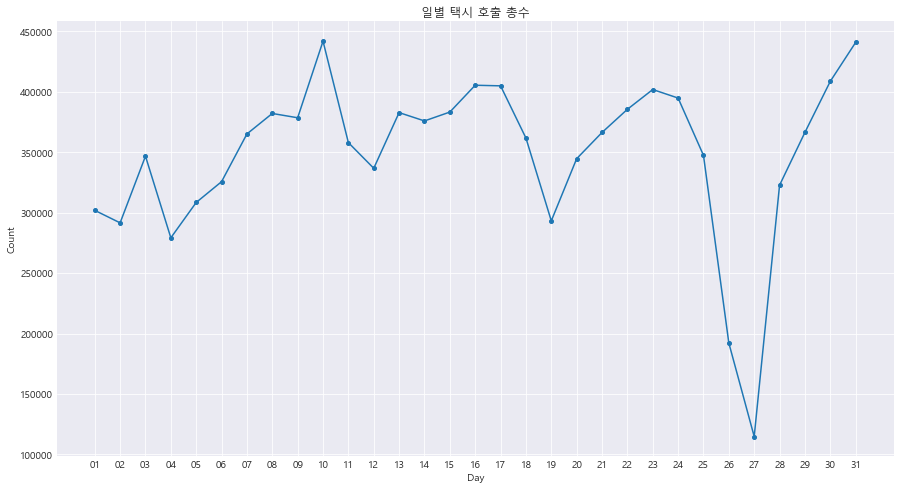

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(df5['day'].str[-2:], df5['cnt'], marker='o', markersize=4)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('일별 택시 호출 총수')
plt.show()

In [15]:
df6 = df5.groupby(['weekday'])['cnt'].mean().to_frame()
df6.reset_index(inplace=True)
df6.rename(columns={'cnt':'avg_cnt'}, inplace=True)

요일 = ['MON','TUE','WED','THU','FRI','SAT','SUN']
df6['weekday'] = [요일[x] for x in df6['weekday']]

df6

,weekday,avg_cnt
0,MON,282687.00
1,TUE,292030.25
2,WED,357601.00
3,THU,363915.80
4,FRI,377299.20
5,SAT,405941.80
6,SUN,336670.50


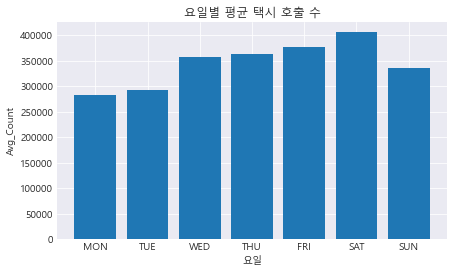

In [16]:
plt.figure(figsize=(7, 4))
plt.bar(df6['weekday'], df6['avg_cnt'])
plt.xlabel('요일')
plt.ylabel('Avg_Count')
plt.title('요일별 평균 택시 호출 수')
plt.show()

In [17]:
df7 = df4.groupby('hour')['cnt'].mean().to_frame()
df7.reset_index(inplace=True)
df7.rename(columns={'cnt':'avg_cnt'}, inplace=True)
df7

,hour,avg_cnt
0,0,12808.290323
1,1,9544.741935
2,2,7155.806452
3,3,5278.483871
4,4,3661.741935
5,5,3222.548387
6,6,6891.516129
7,7,11949.258065
8,8,14939.870968
9,9,15792.451613


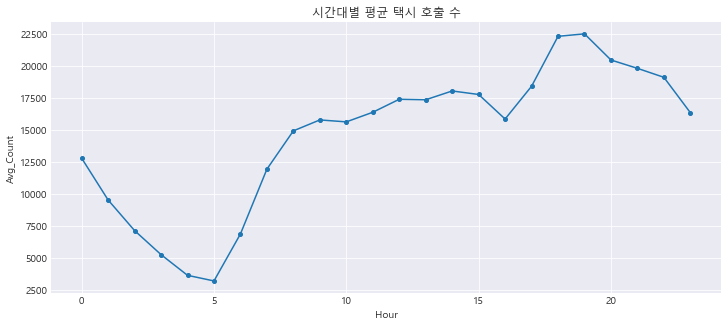

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df7['hour'], df7['avg_cnt'], marker ='o', markersize=4)
plt.xlabel('Hour')
plt.ylabel('Avg_Count')
plt.title('시간대별 평균 택시 호출 수')
plt.show()

In [19]:
df8 = df4.groupby(['weekday','hour'])['cnt'].mean().unstack()
df8.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df8

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,7085.50,4403.50,2966.50,2214.25,2110.75,3253.75,8052.00,13801.00,17135.25,16653.25,...,16442.75,15529.25,13349.5,15145.25,17828.00,16778.25,14653.25,13301.25,11224.75,7953.75
Tue,5535.75,3004.25,1899.25,1198.25,1284.00,2529.25,7069.75,13042.25,15900.75,15215.00,...,15208.75,15328.75,13699.5,16652.00,21378.25,20821.50,19740.75,19378.75,16502.75,11692.25
Wed,7241.75,4262.25,2694.00,1867.50,1816.25,3221.25,9348.75,17368.75,20933.25,19750.25,...,18093.75,17785.75,15453.0,19190.75,24681.25,25252.75,23205.50,22688.25,20830.75,14448.50
Thu,11742.20,8730.00,6347.00,5121.60,3983.20,3999.00,8652.40,15178.40,17996.00,17313.80,...,17892.20,17927.00,15219.8,18304.80,23030.00,23704.40,22555.80,22447.80,21174.40,17442.40
Fri,11845.60,7302.80,4823.60,3235.40,2655.60,3284.20,8360.00,14702.20,17346.60,17678.60,...,18665.20,18006.40,15658.8,19543.20,24549.00,26335.60,24187.80,23374.40,24463.60,23941.00
Sat,21919.20,18105.00,14004.00,10262.00,6242.40,3013.40,3671.40,5386.80,8691.80,13265.40,...,20165.40,20823.20,19446.2,21157.60,24660.80,25828.60,22074.40,21881.40,24103.20,24626.40
Sun,22517.50,19629.50,16429.50,12354.50,7066.00,3099.75,3084.00,4310.50,6771.75,10450.75,...,19267.25,18205.50,17538.5,18015.75,18790.00,16780.25,15029.00,13607.00,12436.50,10166.00


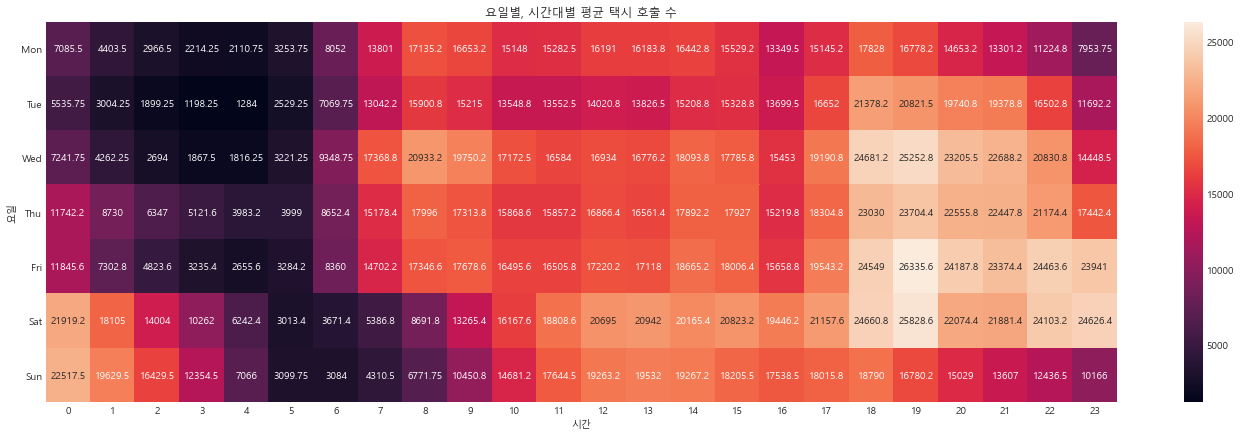

In [20]:
fig, ax = plt.subplots(figsize=(24,7))
pal = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df8, annot=True, ax=ax, linewidths=0, fmt='g', cmap=pal)
plt.yticks(rotation=0)
plt.xlabel('시간')
plt.ylabel('요일') 
plt.title('요일별, 시간대별 평균 택시 호출 수')
plt.show()